In [26]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans , DBSCAN
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as pl

In [2]:
#Load customers data
df = pd.read_csv("/content/drive/MyDrive/Internship/Cust_Segmentation.csv")

In [3]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [12]:
# Define K-means model
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)

In [9]:
# Train the model
data = kmeans_model.fit(df[['Income' ,	'Card Debt', 'DebtIncomeRatio']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Create the K means model for different values of K
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

In [15]:
# Find output for k values between 1 to 12 
outputs = try_different_clusters(12, df[['Income' ,	'Card Debt', 'DebtIncomeRatio']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [16]:
# Finding optimal number of clusters k
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()


In [17]:
# Re-Train K means model with k=5
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(df[['Income' ,	'Card Debt', 'DebtIncomeRatio']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 2, 3, 0, 4, 2, 3, 2, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       3, 2, 1, 2, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 0, 0, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 3, 2, 0, 0, 2, 2, 0, 0, 0, 2, 3, 3, 0, 2, 2, 0, 3,
       2, 0, 0, 0, 3, 2, 2, 3, 0, 0, 3, 0, 1, 3, 2, 2, 1, 3, 3, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 3, 3, 0, 3, 0, 0, 3, 2,
       3, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 3, 3, 2, 3, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0,
       2, 3, 1, 2, 0, 3, 0, 3, 2, 3, 0, 0, 3, 0, 0, 3, 2, 0, 0, 3, 0, 0,
       3, 0, 3, 2, 3, 3, 0, 1, 0, 3, 0, 0, 3, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       4, 0, 1, 0, 0, 0, 0, 3, 0, 4, 2, 0, 0, 3, 3, 2, 0, 0, 2, 2, 3, 3,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 2, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 0, 1, 2, 3, 3, 0, 0, 3, 0, 0, 2, 3, 3, 0, 0, 0, 0, 2, 3, 3,
       2, 3, 3, 2, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 2,

In [18]:
# Create data arrays
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

array([[4.33231956e+010, 1.26180512e+000, 2.75784880e+004,
        2.44919540e+001, 8.16163218e-001, 1.02248276e+001],
       [1.15089603e+058, 6.54438442e+001, 1.30133715e+004,
        1.33690476e+002, 4.19635714e+000, 9.47380952e+000],
       [6.27033726e+033, 1.71279561e+001, 5.11782487e+004,
        7.78211382e+001, 2.89745528e+000, 1.08430894e+001],
       [1.34756349e+020, 3.74678082e+000, 2.06392844e+004,
        4.63500000e+001, 1.55746667e+000, 9.93500000e+000],
       [4.47069608e+117, 2.65346923e+003, 3.67654247e+003,
        2.70900000e+002, 7.88400000e+000, 8.21000000e+000]])

In [20]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
df["clusters"] = kmeans_model_new.labels_

In [21]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,clusters
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9,3
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2,4


In [24]:
# visualize clusters
figure = px.scatter_3d(df,
                    color='clusters',
                    x="Income",
                    y="Card Debt",
                    z="DebtIncomeRatio",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

In [37]:
X = df[['Income' ,	'Card Debt', 'DebtIncomeRatio']]

In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [38]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)


DBSCAN(eps=0.3)

In [39]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)


GaussianMixture(n_components=3)

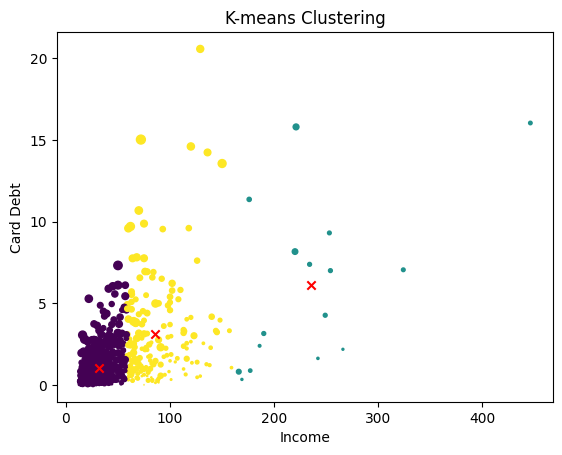

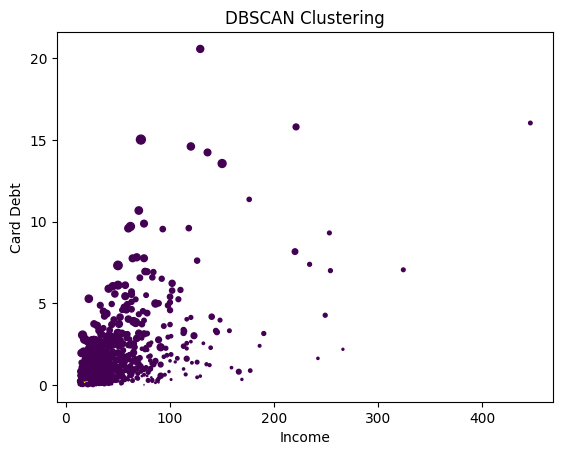

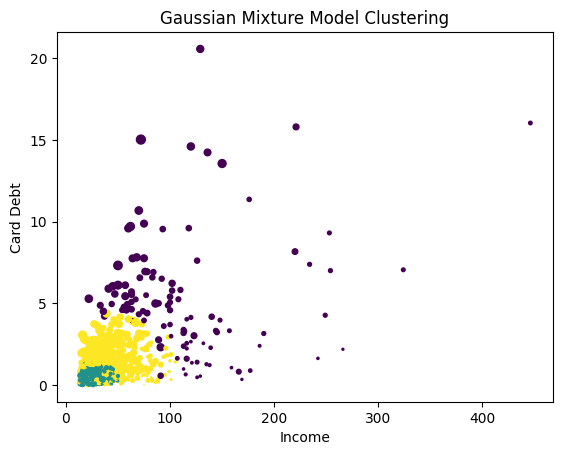

In [42]:
# K-means clustering visualization
plt.scatter(X['Income'], X['Card Debt'], X['DebtIncomeRatio'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.show()

# DBSCAN clustering visualization
plt.scatter(X['Income'], X['Card Debt'], X['DebtIncomeRatio'], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.show()

# GMM clustering visualization
plt.scatter(X['Income'], X['Card Debt'], X['DebtIncomeRatio'], c=gmm.predict(X), cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.show()
